In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# Importing data
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '2015_Street_Tree_Census_-_Tree_Data_20240605.csv',
 'aerofit_treadmill_data.csv',
 'BeautifulSoup and Requests.ipynb',
 'Cleaning Cricket Dataset.ipynb',
 'crime.csv',
 'crime.zip',
 'Customer Call List.xlsx',
 'Data Cleaing in Pandas.ipynb',
 'data_cleaning_challenge.csv',
 'data_cleaning_challenge.ipynb',
 'EDA of Crime Dataset.ipynb',
 'EDA of Crime Dataset.pdf',
 'EDA with Crime Dataset.ipynb',
 'layoffs.csv',
 'Loan Default Predictor',
 'Records for Test Matches.csv',
 'Records for Test Matches.xlsx',
 'Scraping Data from a Real Website + Pandas.ipynb',
 'SurveyMonkey Data Transformation and Analysis',
 'Treadmill Purchase Analysis.ipynb']

In [3]:
df = pd.read_csv('aerofit_treadmill_data.csv')
# Get overview of dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
# Shape of dataframe
df.shape

(180, 9)

In [5]:
# Identify name of all columns
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
# Convert columns with object data type
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [8]:
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [9]:
df.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

## Statistical Summary

In [10]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### Observations
- there are no missing values in the data
- there are 3 unique `products`
- `KP281` is the most frequent product
- min `age` is 18, max `age` is 50, and average `age` is 28.79
- most of the people have at most `16 years of education`
- majority of the data is from `male`

In [11]:
# Check for missing values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [12]:
# Check for duplicates in dataset
df.duplicated().sum()

0

## Non-Graphical Analysis

### Value Counts

In [13]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [14]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [15]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

### Unique Attributes

In [16]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [17]:
df['Product'].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [18]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [19]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [20]:
df['MaritalStatus'].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [21]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [22]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [23]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [24]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

## Graphical Analysis

### Univariate Analysis - Numerical Variables

#### Distance Plot

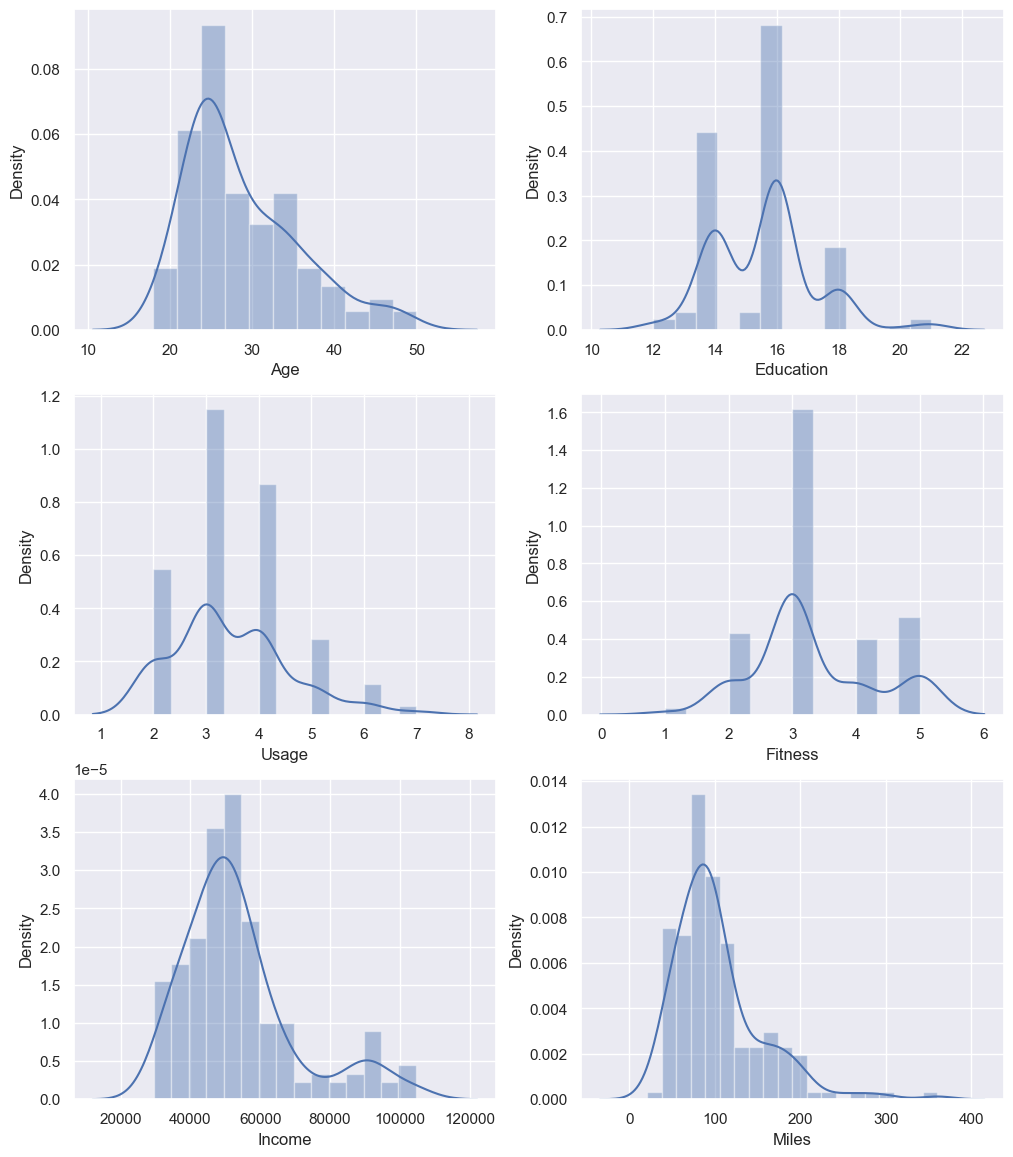

In [25]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.distplot(df['Age'], kde=True, ax=axis[0,0])
sns.distplot(df['Education'], kde=True, ax=axis[0,1])
sns.distplot(df['Usage'], kde=True, ax=axis[1,0])
sns.distplot(df['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(df['Income'], kde=True, ax=axis[2,0])
sns.distplot(df['Miles'], kde=True, ax=axis[2,1])
plt.show()

#### Observations
- `Income` and `Miles` are skewed to the right suggesting that they outliers
- most customers has `Fitness` level 3
- most customer has `Income` within the range of `$45,000 - $55,000`

### Count Plot

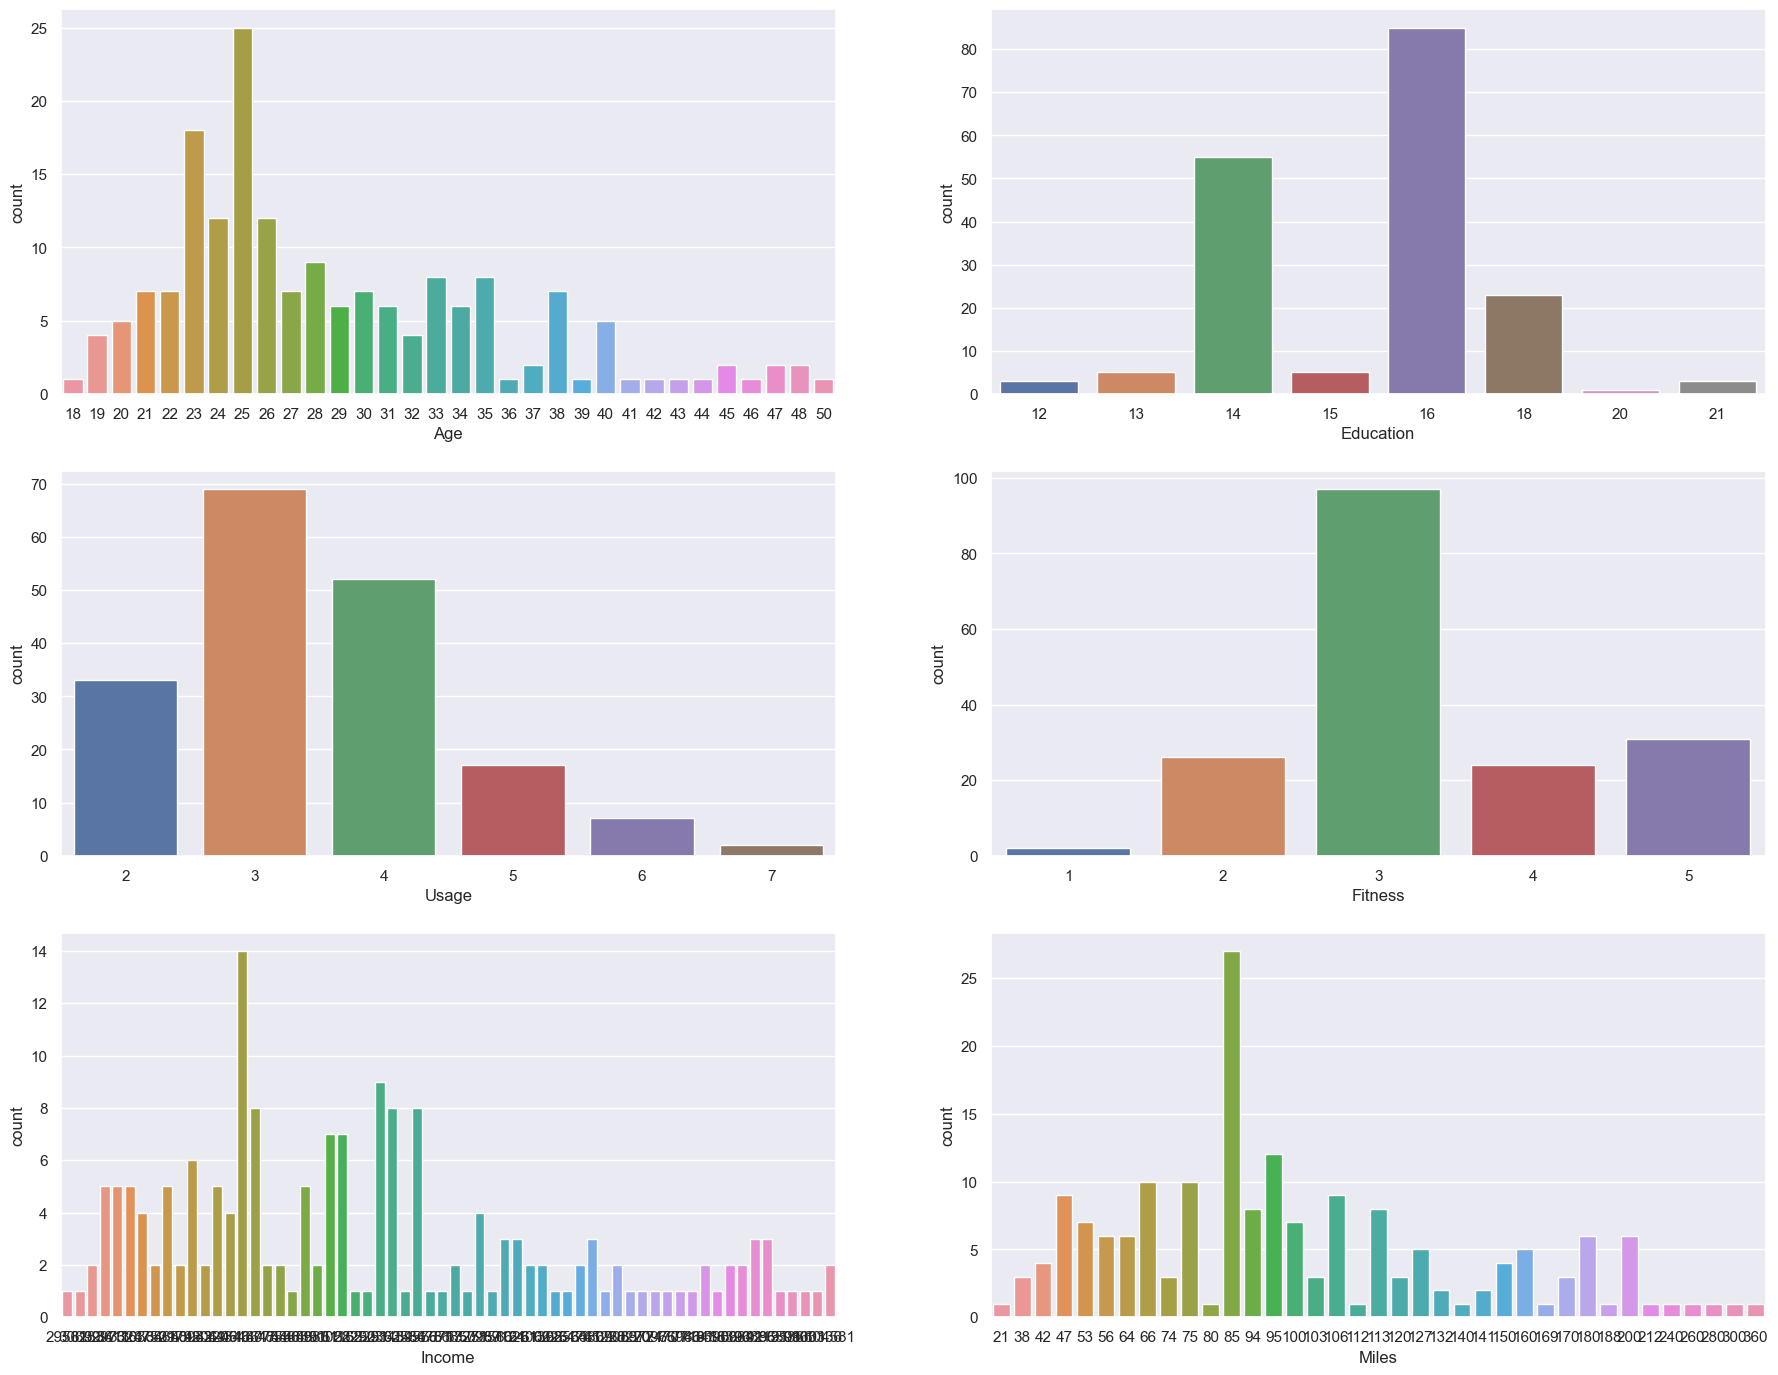

In [26]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(22,12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x='Age', ax=axis[0,0])
sns.countplot(data=df, x='Education', ax=axis[0,1])
sns.countplot(data=df, x='Usage', ax=axis[1,0])
sns.countplot(data=df, x='Fitness', ax=axis[1,1])
sns.countplot(data=df, x='Income', ax=axis[2,0])
sns.countplot(data=df, x='Miles', ax=axis[2,1])
plt.show()

#### Observations
- people of `age 25` are more inclined to buy treadmills compared to older people 

### Box Plot

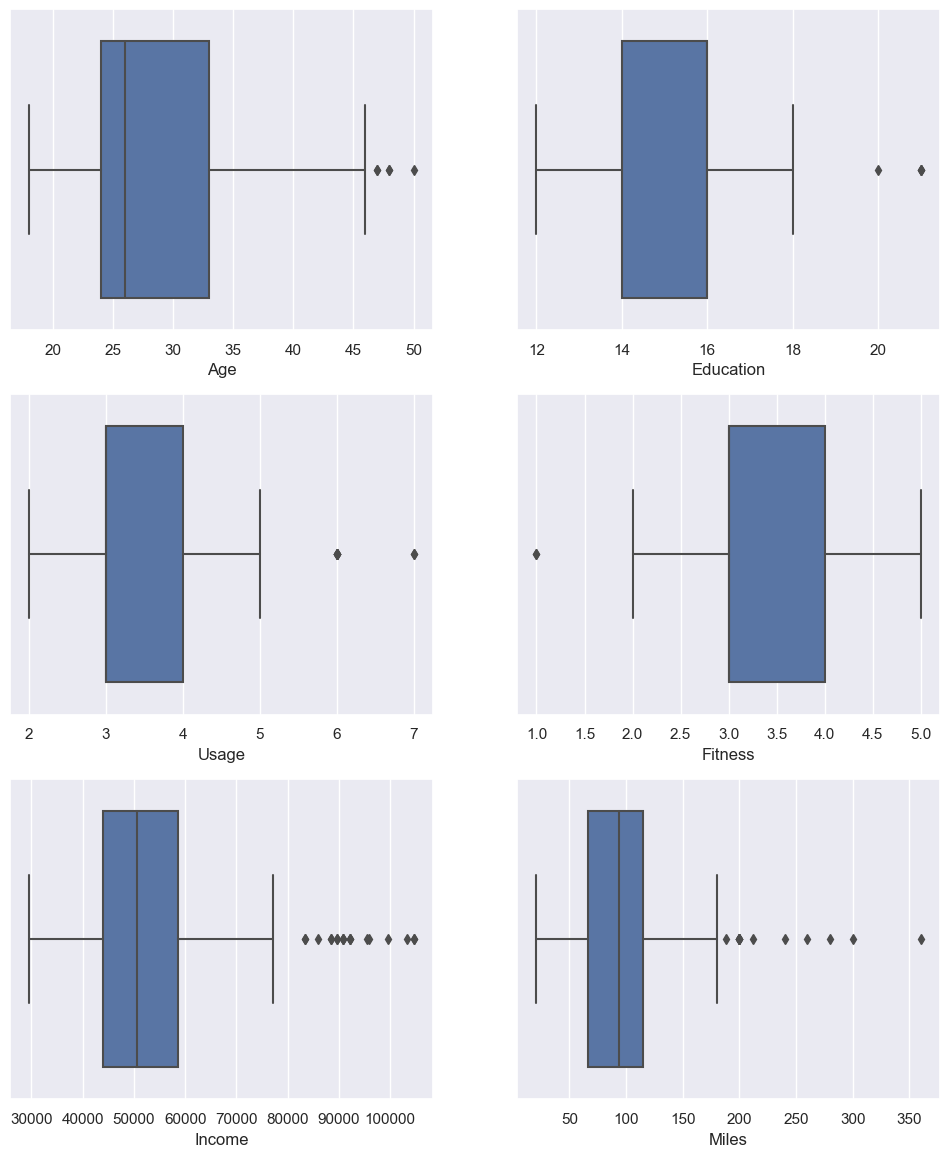

In [27]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x='Age', ax=axis[0,0])
sns.boxplot(data=df, x='Education', ax=axis[0,1])
sns.boxplot(data=df, x='Usage', ax=axis[1,0])
sns.boxplot(data=df, x='Fitness', ax=axis[1,1])
sns.boxplot(data=df, x='Income', ax=axis[2,0])
sns.boxplot(data=df, x='Miles', ax=axis[2,1])
plt.show()

#### Observations
- `Age`, `Education`, `Usage`, and `Fitness` have very few outliers

### Univariate Analysis - Categorical Variables

### Count Plot

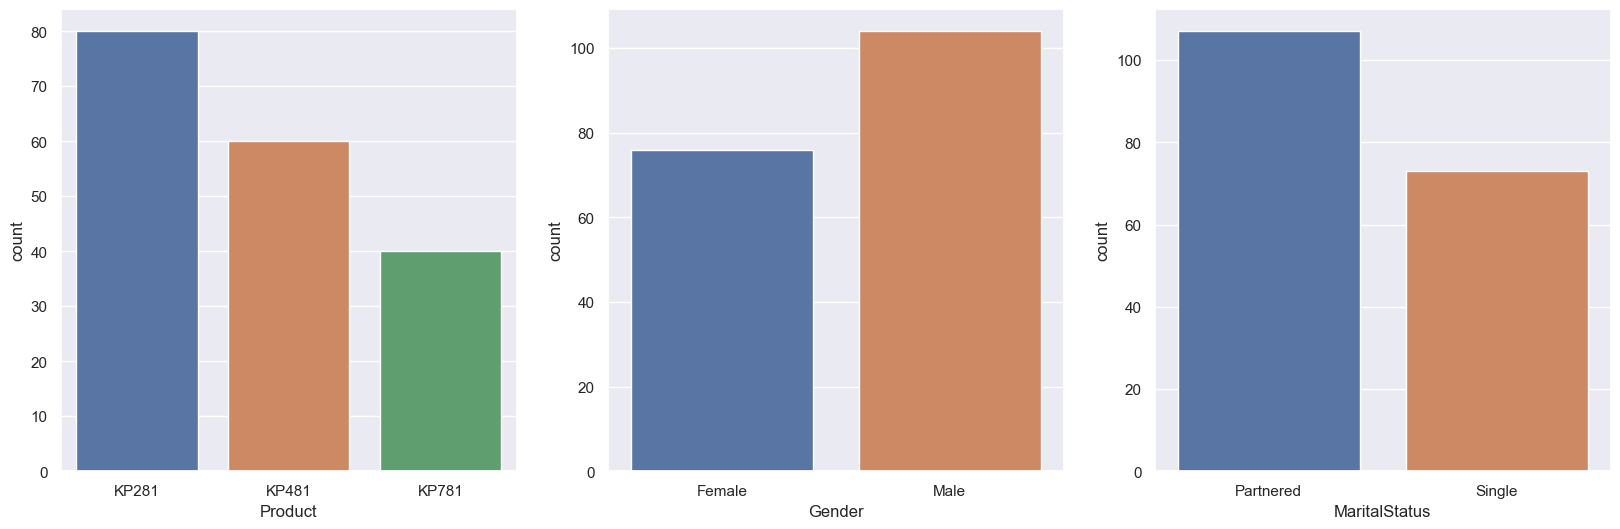

In [28]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
sns.countplot(data=df, x='Product', ax=axis[0])
sns.countplot(data=df, x='Gender', ax=axis[1])
sns.countplot(data=df, x='MaritalStatus', ax=axis[2])

plt.show()

#### Observations
- most popular treadmill is the `KP281`
- most of the customers are `Male`
- most customers that purchase treadmills are `Partnered`

### Bivariate Analysis

Checking if features have any effect on product being purchased.

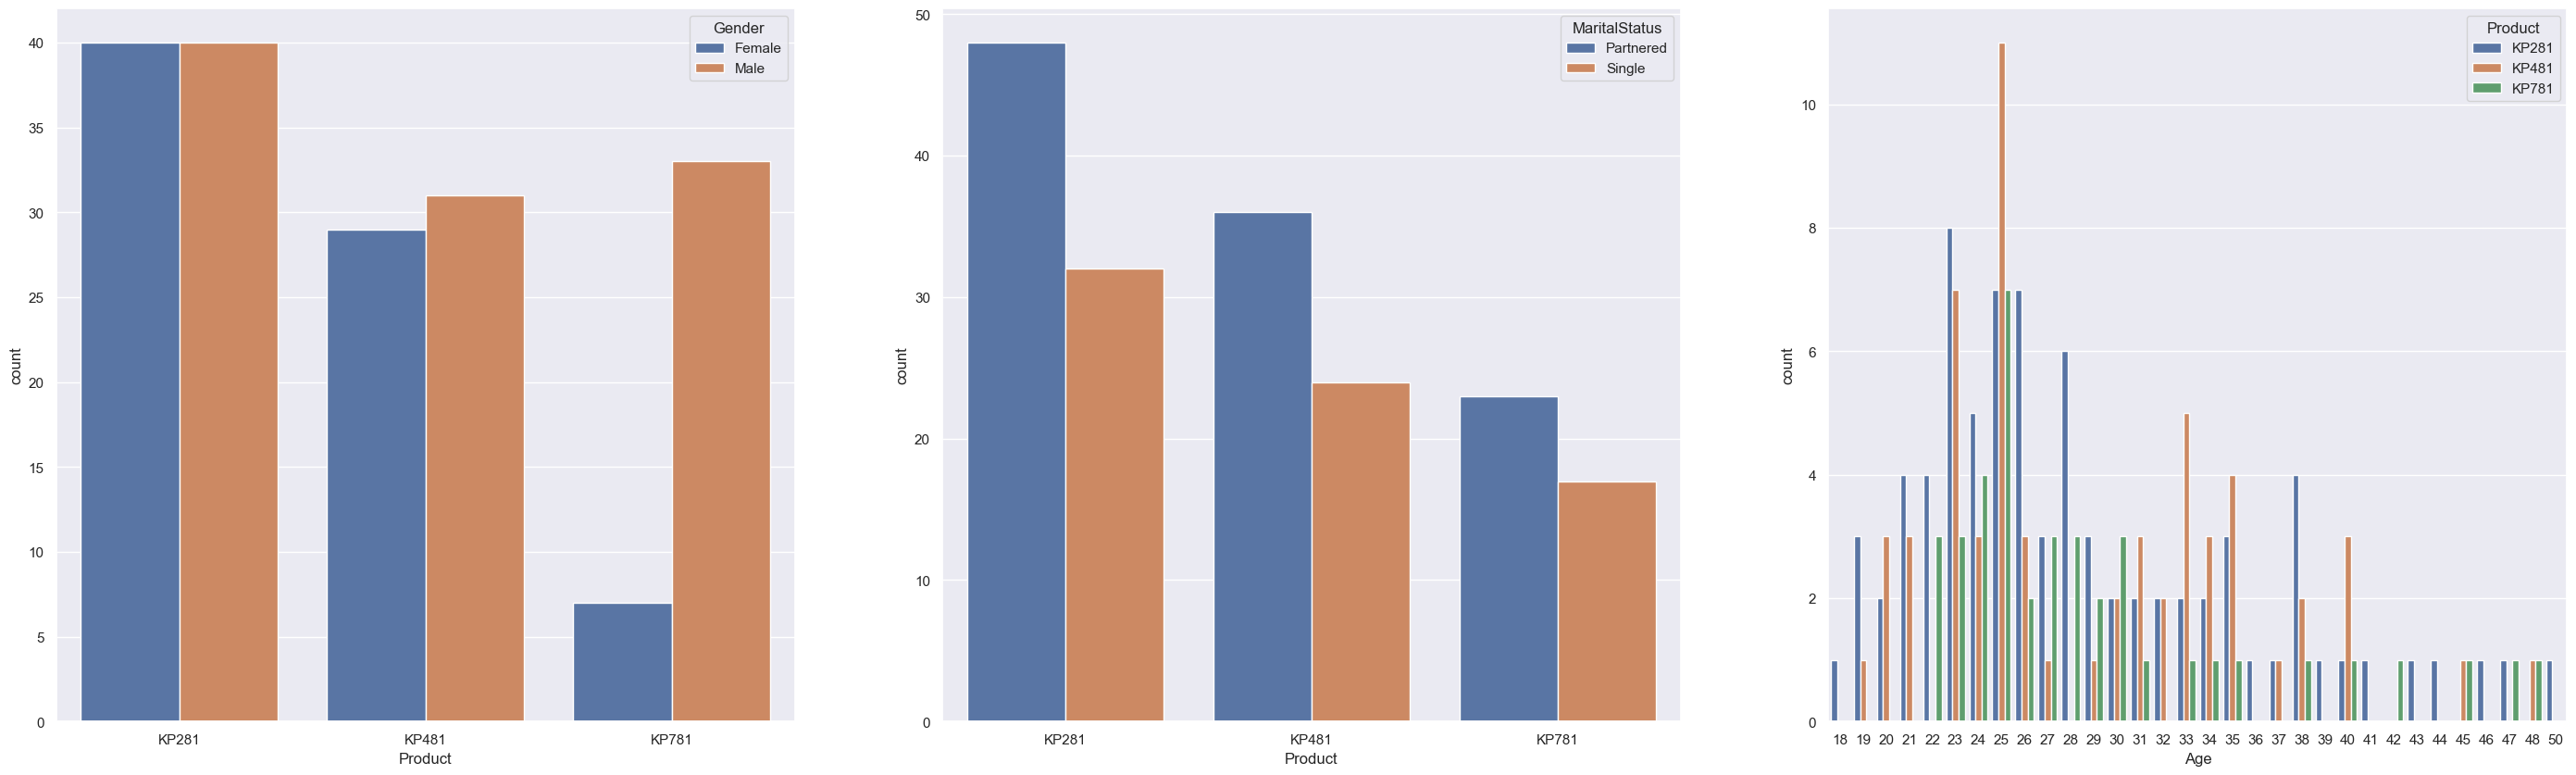

In [29]:
fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize=(35,10))
sns.countplot(data = df, x = 'Product', hue = 'Gender', ax = axis[0])
sns.countplot(data = df, x = 'Product', hue = 'MaritalStatus', ax = axis[1])
sns.countplot(data = df, x = 'Age', hue = 'Product', ax = axis[2])

plt.show()

#### Observations
- Equal number of males and females have purchased the `KP281` which is the most desirable
- Most of the purchases were from `partnered` customers
- Customers of the `age 25` are more likely to purchase the `KP481`

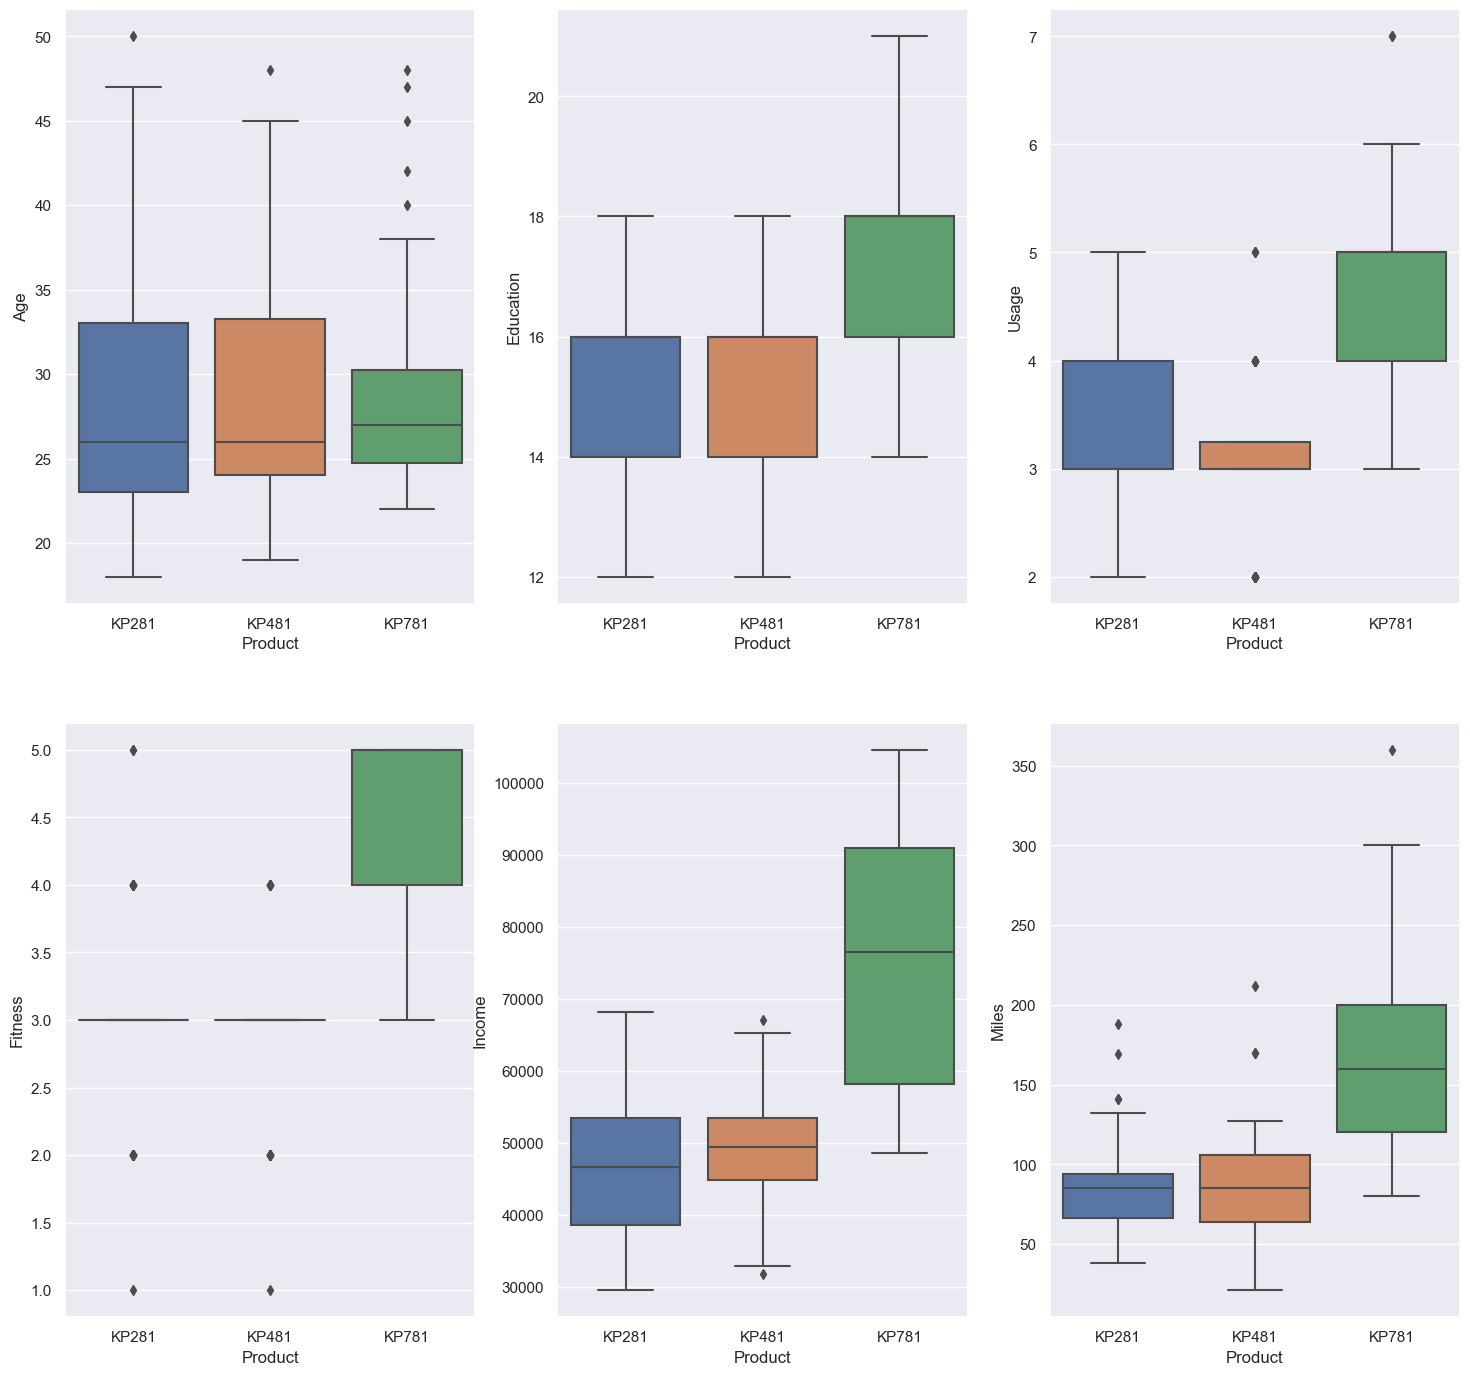

In [30]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig,axis = plt.subplots(nrows = 2, ncols = 3, figsize = (18,12))
fig.subplots_adjust(top = 1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data = df, x = 'Product', y = attributes[count], ax = axis[i,j])
        count += 1

#### Observations

#### Product vs Age
- `KP281` and `KP481` share the same customer's median `Age`.
- Customers between age 25 - 30 are likely to purchase the `KP781`.

#### Product vs Education
- Customers that has over 16 years of education are more likely to purchase `KP781`.
- Customers with less than 16 years of education have equal chance of purchasing `KP281` or `KP481`.

#### Product vs Usage
- Customers who purchased `KP781` are likely to use it more than 4 times a week.

#### Product vs Fitness
- Customers with high fitness level (fitness > 3) have a higher chance of purchasing the `KP781`.

#### Product vs Income
- Customers with higher income (income > 60,000) are more likely to purchase the `KP781`.

#### Product vs Miles
- Customers that walk/run for more than 120 miles per week are likelier to buy the `KP781`.

### Correlation Analysis

In [31]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


### Heatmaps

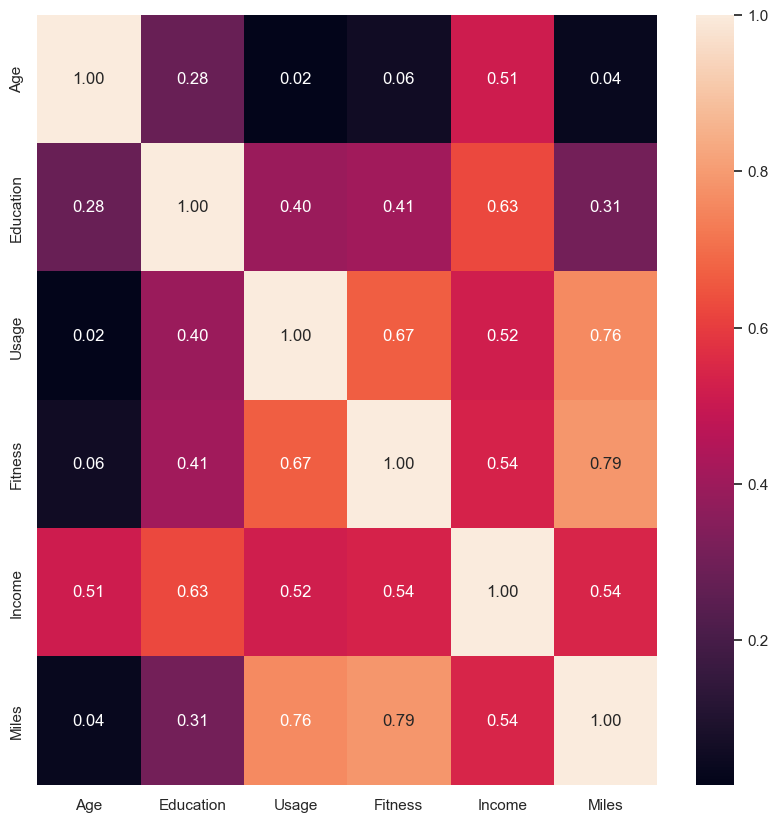

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set(color_codes=True)
sns.heatmap(df.corr(), ax=ax, annot=True, fmt='0.2f')
plt.show()

#### Observation
- (`Miles` & `Usage`) and (`Miles` & `Fitness`) attributes are highly correlated which means fit customers tend to use more treadmills.
- `Income` and `Education` shows a strong correlation. Customers with high income and very educated prefer the `KP781` treadmill.